# 2 Naive Bayes


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

reading the data 

In [2]:
df = pd.read_csv('train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


splitting it into test and trainning data

In [3]:
X = df.iloc[:, 1:785].values
y = df.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0 )

## Gaussian Naive Bayes

Trainning the model

In [4]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None)

Applying the model on the test data

In [5]:
predicted = model.predict(X_test)
expected = y_test
print(predicted[0:50])
print(expected[0:50])

[3 6 9 8 6 9 6 8 0 1 9 1 8 7 8 1 1 8 9 6 9 6 2 8 9 6 8 8 4 4 1 6 8 9 9 8 9
 8 6 9 6 3 1 7 1 7 9 6 6 0]
[3 6 9 5 6 5 6 0 0 1 7 1 5 7 8 1 1 5 9 6 9 2 2 8 4 6 2 5 4 4 8 2 8 9 3 8 4
 5 2 7 6 3 1 7 9 7 4 2 5 0]


**Measuring the performace of the model**

In [6]:
print("Accuracy:", model.score(X_test, y_test))

('Accuracy:', 0.5722857142857143)


In [7]:
print("confusion_matrix:")
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predicted))


confusion_matrix:
[[1680    5   16    6    2    6  173    2  163   11]
 [   0 2238    8   12    1    4   38    2   42   10]
 [ 125   76  565  269   10   32  607    7  429   12]
 [  45  144   19  918    2    5  176   21  757  104]
 [  23   48   19   12  306   22  293   11  492  800]
 [ 123   78   11   55   11  168  169    2 1186   91]
 [   4   41    9    5    1    9 1981    0   26    1]
 [   8   26    3   29   17    1   10  931  105 1061]
 [  15  365    9   26    9   19   67    1 1357  123]
 [  12   48    5    3   19    1    2   35   80 1874]]


In [8]:
print("Classification report:")
from sklearn.metrics import classification_report 
print(classification_report(y_test, predicted))

Classification report:
             precision    recall  f1-score   support

          0       0.83      0.81      0.82      2064
          1       0.73      0.95      0.83      2355
          2       0.85      0.27      0.40      2132
          3       0.69      0.42      0.52      2191
          4       0.81      0.15      0.25      2026
          5       0.63      0.09      0.16      1894
          6       0.56      0.95      0.71      2077
          7       0.92      0.42      0.58      2191
          8       0.29      0.68      0.41      1991
          9       0.46      0.90      0.61      2079

avg / total       0.68      0.57      0.54     21000



**Viewing the the ones that predicted wrong**

In [9]:
(y_test != predicted).sum()

8982

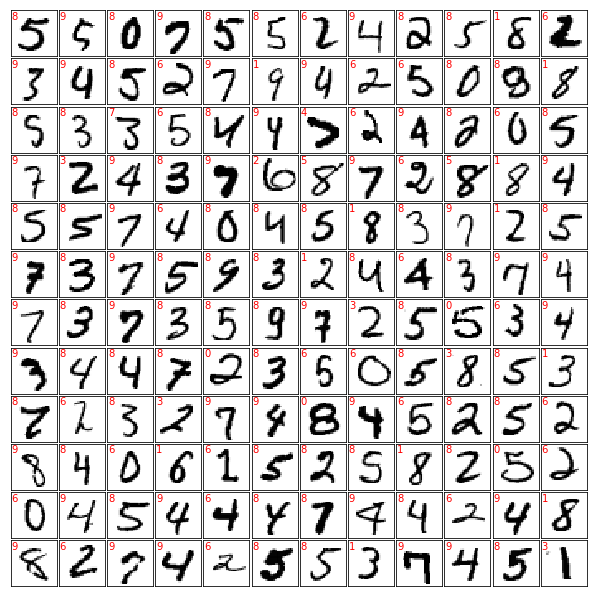

In [10]:
wrong = X_test[y_test != predicted]
wrong_pred = predicted[y_test != predicted]
wrong_exp = y_test[y_test != predicted]

fig = plt.figure(figsize=(8, 8))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 28x28 pixels
for i in range(144):
    ax = fig.add_subplot(12, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(wrong.reshape(-1, 28, 28)[i], cmap=plt.cm.binary,
              interpolation='nearest')
    
    ax.text(0, 5, str(wrong_pred[i]), color='red')
    


## Multinominal Naive Bayes

In [11]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes_mn = MultinomialNB()
naive_bayes_mn.fit(X_train, y_train)

predicted = naive_bayes_mn.predict(X_test)
expected = y_test

print(naive_bayes_mn.score(X_test, y_test))

0.8254761904761905


In [12]:
print(classification_report(y_test, predicted))

             precision    recall  f1-score   support

          0       0.92      0.91      0.91      2064
          1       0.90      0.93      0.91      2355
          2       0.89      0.83      0.86      2132
          3       0.78      0.80      0.79      2191
          4       0.83      0.75      0.79      2026
          5       0.84      0.65      0.73      1894
          6       0.87      0.93      0.90      2077
          7       0.95      0.83      0.88      2191
          8       0.64      0.77      0.70      1991
          9       0.70      0.82      0.75      2079

avg / total       0.83      0.83      0.83     21000

